In [151]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [49]:
df=pd.read_csv('../Data/clean_data.csv')
df = df.dropna(axis=0)

In [50]:
df.head()

,Unnamed: 0,level_0,index,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,ta_to_channel,no_deposit,refundable_deposit,nonrefundable_deposit,with_company,is_contract,is_group,is_transient,is_transient_party,stay_length
0,0,0,2,7.0,7.0,27.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,1,3,13.0,7.0,27.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,2,4,14.0,7.0,27.0,1.0,0.0,2.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
3,3,3,5,14.0,7.0,27.0,1.0,0.0,2.0,2.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
4,4,4,6,0.0,7.0,27.0,1.0,0.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [238]:
features = list(df.columns)
features = features[3:]
features.remove('adr')
print(features)

['lead_time', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'is_resort', 'bought_meal', 'aviation_segment', 'corporate_segment', 'groups_segment', 'offline_ta_to_segment', 'online_ta_segment', 'corporate_channel', 'direct_channel', 'gds_channel', 'ta_to_channel', 'no_deposit', 'refundable_deposit', 'nonrefundable_deposit', 'with_company', 'is_contract', 'is_group', 'is_transient', 'is_transient_party', 'stay_length', 'y_bin']


In [239]:
X = df.loc[:, features].values
# X = X[~np.isnan(X).any(axis=1), :]
print(X)
y = df.loc[:, ['adr']].values

[[  7.   7.  27. ...   0.   1.   2.]
 [ 13.   7.  27. ...   0.   1.   2.]
 [ 14.   7.  27. ...   0.   2.   2.]
 ...
 [ 93.   5.  21. ...   0.   6.   3.]
 [212.   5.  21. ...   1.   5.   2.]
 [ 25.   5.  22. ...   0.   3.   3.]]


In [240]:
X = StandardScaler().fit_transform(X)

In [248]:
pca = PCA(n_components=25)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [249]:
finalDf = pd.concat([principalDf, df[['adr']]], axis = 1)
finalDf.head

<bound method NDFrame.head of               0         1         2         3         4         5         6  \
0     -1.753395 -1.050293 -0.021232  1.867108  0.151050 -2.010805  1.030547   
1     -4.187768 -0.244452  0.993473 -0.462028 -0.680571 -0.730506  0.349980   
2      0.376733 -1.765223 -0.660738 -0.379693 -0.323862  0.329211  0.237770   
3      0.376733 -1.765223 -0.660738 -0.379693 -0.323862  0.329211  0.237770   
4     -1.056709 -1.069312  0.295670  2.079975  0.243143 -1.867997  0.869117   
...         ...       ...       ...       ...       ...       ...       ...   
43336  1.124412  2.520520 -0.973893 -1.124339  0.761257 -0.858014  0.109860   
43337  1.293870  2.269328 -0.860091 -1.152910  0.659615 -0.520422 -0.086743   
43338  1.577343 -0.989450  0.344649 -0.846061  0.383871  0.721586 -0.444091   
43339  1.293870  2.269328 -0.860091 -1.152910  0.659615 -0.520422 -0.086743   
43340  0.993232 -1.952692 -0.549494 -0.669502 -0.060841  0.957469 -0.334325   

              7      

In [250]:
var_exp = pca.explained_variance_ratio_

In [251]:
print(var_exp)
print(np.sum(var_exp))

[0.12420659 0.09150647 0.07539643 0.06208095 0.05803925 0.04945198
 0.04340383 0.04013881 0.03417843 0.03180827 0.03029677 0.02956532
 0.02919196 0.02864767 0.02803031 0.02710615 0.02585562 0.02428829
 0.0226857  0.02065033 0.01961175 0.01783065 0.01613306 0.01544308
 0.01283701]
0.9583846729032651


In [252]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.9063732287570457

In [253]:
reg2 = LinearRegression().fit(principalDf.values, df[['adr']].values)
reg2.score(principalDf.values, df[['adr']].values)

0.9045158419711335

In [63]:
features_refined = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'total_of_special_requests', 'stay_length']

In [64]:
print(features_refined)

['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'total_of_special_requests', 'stay_length']


In [103]:
X = df.loc[:,features_refined].values
X = StandardScaler().fit_transform(X)

In [104]:
y = df['adr'].values

In [105]:
reg3 = LinearRegression().fit(X, y)
reg3.score(X, y)

0.2136982716339355

(array([1.0000e+00, 7.5980e+03, 2.3723e+04, 7.8980e+03, 0.0000e+00,
        2.9310e+03, 9.4100e+02, 2.0700e+02, 4.0000e+01, 2.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

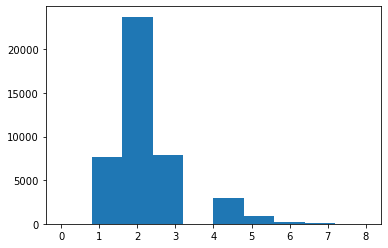

In [106]:
bin_edges = np.linspace(np.min(y), np.max(y), 10)
y_bin = np.zeros(np.shape(y))
for i in range(len(y)):
    for j in range(len(bin_edges)):
        if y[i] < bin_edges[j]:
            y_bin[i] = j
            break
plt.hist(y_bin)

In [108]:
X = StandardScaler().fit_transform(X)
clf = LogisticRegression(random_state=0).fit(X, y_bin)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
clf.score(X, y_bin)

0.5550633349484322

In [110]:
df['y_bin'] = y_bin

In [116]:
resort = df['adr'].loc[df['is_resort'] == 1]
city = df['adr'].loc[df['is_resort'] == 0]

(array([5.2630e+03, 1.2735e+04, 4.7220e+03, 2.7500e+03, 1.3680e+03,
        4.0900e+02, 1.2800e+02, 2.0000e+01, 0.0000e+00, 1.0000e+00]),
 array([ -6.38 ,  45.058,  96.496, 147.934, 199.372, 250.81 , 302.248,
        353.686, 405.124, 456.562, 508.   ]),
 <BarContainer object of 10 artists>)

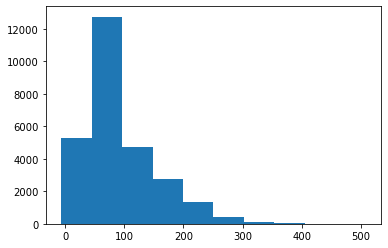

In [117]:
plt.hist(resort)

(array([6.900e+01, 1.918e+03, 7.955e+03, 4.107e+03, 1.236e+03, 4.900e+02,
        1.150e+02, 4.600e+01, 7.000e+00, 2.000e+00]),
 array([  1.  ,  32.75,  64.5 ,  96.25, 128.  , 159.75, 191.5 , 223.25,
        255.  , 286.75, 318.5 ]),
 <BarContainer object of 10 artists>)

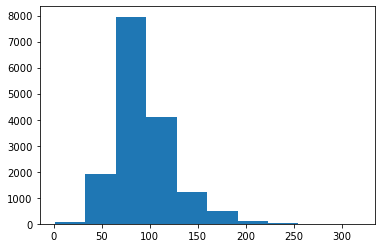

In [118]:
plt.hist(city)

In [190]:
def make_data(df, features, normalize=True, binned=False):
    X = df.loc[:,features].values
    if normalize:
        X = StandardScaler().fit_transform(X)
    if binned:
        y = df['y_bin'].values
    else:
        y = df['adr'].values
    return X, y

def lin_reg(X,y):
    reg = LinearRegression().fit(X, y)
    return (reg.score(X, y))

def log_reg(X, y_bin):
    clf = LogisticRegression(random_state=0).fit(X, y_bin)
    return(clf.score(X, y_bin))

def tree_reg(X,y):
    clf = tree.DecisionTreeRegressor()
    clf = clf.fit(X, y)
    y_hat = clf.predict(X)
    rmse = np.sqrt(np.mean((y_hat-y)**2))
    return y_hat, rmse

In [191]:
df_resort = df.loc[df['is_resort'] == 1]
df_city = df.loc[df['is_resort'] == 0]

In [197]:
X, y = make_data(df, features_refined, normalize = True, binned=True)
lin_reg(X,y)

0.1886750040270344

In [198]:
X, y = make_data(df, features_refined, normalize = True, binned=True)
log_reg(X,y)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5550633349484322

In [199]:
X, y = make_data(df_resort, features_refined, normalize = True, binned=False)
lin_reg(X,y)

0.2526505499484565

In [200]:
X, y = make_data(df_city, features_refined, normalize = True, binned=False)
lin_reg(X,y)

0.18545379854597654

(array([3.8042e+04, 4.3240e+03, 7.7700e+02, 1.6800e+02, 2.7000e+01,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.        ,  39.37857143,  78.75714286, 118.13571429,
        157.51428571, 196.89285714, 236.27142857, 275.65      ,
        315.02857143, 354.40714286, 393.78571429]),
 <BarContainer object of 10 artists>)

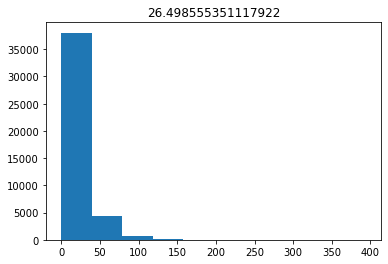

In [202]:
X, y = make_data(df, features_refined, normalize = True, binned=False)
y_hat, rmse = tree_reg(X,y)
plt.title(str(rmse))
plt.hist((np.abs((y_hat-y))))

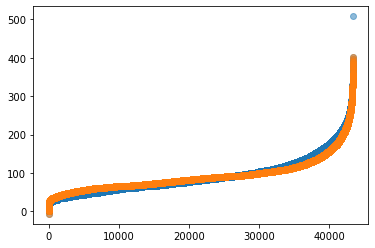

In [203]:
x = range(len(y))
plt.scatter(x,np.sort(y), alpha=.5)
plt.scatter(x,np.sort(y_hat), alpha=.5)

In [204]:
features = list(df.columns)
features = features[3:]
features.remove('adr')
X, y = make_data(df, features, normalize = False, binned=False)
y_hat, rmse = tree_reg(X,y)

(array([4.2451e+04, 4.3000e+02, 2.2800e+02, 1.4000e+02, 3.8000e+01,
        2.9000e+01, 1.3000e+01, 8.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([ 0.        ,  2.66666667,  5.33333333,  8.        , 10.66666667,
        13.33333333, 16.        , 18.66666667, 21.33333333, 24.        ,
        26.66666667]),
 <BarContainer object of 10 artists>)

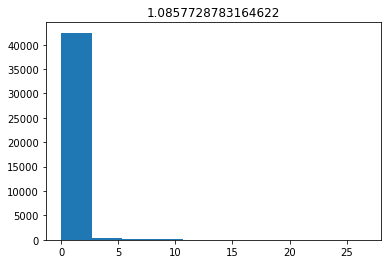

In [205]:
plt.title(str(rmse))
plt.hist((np.abs((y_hat-y))))

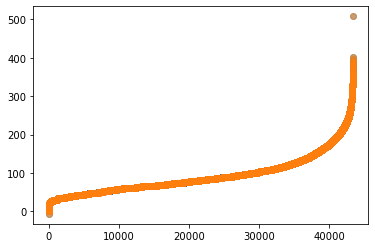

In [206]:
x = range(len(y))
plt.scatter(x,np.sort(y), alpha=.5)
plt.scatter(x,np.sort(y_hat), alpha=.5)

In [260]:
def make_dataset(df, features, test_size=4300, normalize = True, binned= False):
    X = df.loc[:,features].values
    if normalize:
        X = StandardScaler().fit_transform(X)
    if binned:
        y = df['y_bin'].values
    else:
        y = df['adr'].values
    
    ind = [np.random.choice(range(len(X)), size=test_size, replace=False)]
    print(ind)
    test_X = X[ind]
    test_y = y[ind]
    print(len(X))
    X = np.delete(X, ind, axis=0)
    y = np.delete(y, ind)
    print(len(X))
    return X, y, test_X, test_y

In [229]:
X, y, test_X, test_y = make_dataset(df, features_refined)
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
y_hat = clf.predict(test_X)
rmse = np.sqrt(np.mean((y_hat-test_y)**2))

[array([13077, 12491, 35189, ...,  5074, 11658,  2874])]
43341
39041


/tmp/ipykernel_229/2128786914.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  test_X = X[ind]
/tmp/ipykernel_229/2128786914.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  test_y = y[ind]


(array([2512.,  963.,  429.,  202.,   96.,   50.,   26.,   12.,    6.,
           4.]),
 array([  0.   ,  28.928,  57.856,  86.784, 115.712, 144.64 , 173.568,
        202.496, 231.424, 260.352, 289.28 ]),
 <BarContainer object of 10 artists>)

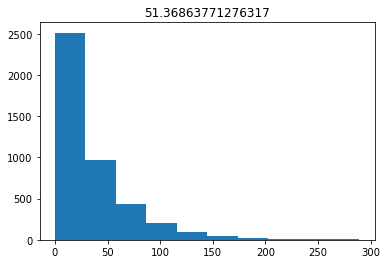

In [231]:
plt.title(str(rmse))
plt.hist((np.abs((y_hat-test_y))))

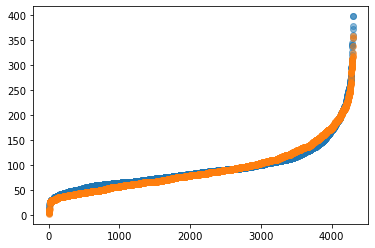

In [236]:
x = range(len(y_hat))
plt.scatter(x,np.sort(y_hat), alpha=.5)
plt.scatter(x,np.sort(test_y), alpha=.5)

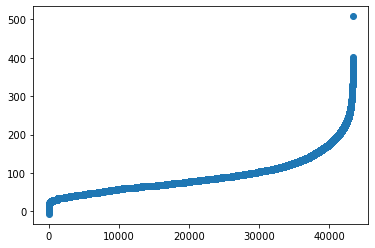

In [237]:
plt.scatter(range(len(df['adr'])), np.sort(df['adr'].values))

In [254]:
principalDf

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.753395,-1.050293,-0.021232,1.867108,0.151050,-2.010805,1.030547,0.147463,0.222841,-0.766064,...,-0.453081,0.108306,-1.374287,0.643481,-0.054660,0.069593,-0.310731,-0.678924,0.799615,-0.250750
1,-4.187768,-0.244452,0.993473,-0.462028,-0.680571,-0.730506,0.349980,-2.180522,0.173013,-0.040425,...,-0.954384,0.457693,-0.193734,0.224886,-0.252442,0.602132,-0.382316,-0.611635,0.668829,-0.609721
2,0.376733,-1.765223,-0.660738,-0.379693,-0.323862,0.329211,0.237770,-0.743532,-0.669221,-0.547308,...,-0.458144,0.423365,-0.424135,-0.315289,-0.433025,0.363840,0.108755,0.256973,0.416607,0.062755
3,0.376733,-1.765223,-0.660738,-0.379693,-0.323862,0.329211,0.237770,-0.743532,-0.669221,-0.547308,...,-0.458144,0.423365,-0.424135,-0.315289,-0.433025,0.363840,0.108755,0.256973,0.416607,0.062755
4,-1.056709,-1.069312,0.295670,2.079975,0.243143,-1.867997,0.869117,0.319371,0.312604,-0.741856,...,-0.549139,0.463134,-0.253282,-0.119217,-0.445487,0.517959,0.075880,0.195514,0.445501,0.269048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43336,1.124412,2.520520,-0.973893,-1.124339,0.761257,-0.858014,0.109860,0.757069,0.010155,0.482584,...,-0.296810,0.250683,0.872583,-0.233915,0.419119,-0.751488,-0.593623,-0.290797,-0.204201,0.948640
43337,1.293870,2.269328,-0.860091,-1.152910,0.659615,-0.520422,-0.086743,0.789468,-0.005047,0.622629,...,-0.033195,0.583027,0.726909,-0.558122,0.441506,-1.246260,-1.129936,-0.094360,-0.462196,0.546896
43338,1.577343,-0.989450,0.344649,-0.846061,0.383871,0.721586,-0.444091,-0.149532,0.600033,-0.624448,...,-0.342152,0.821779,0.260439,-0.149711,0.966253,0.059233,0.320305,-0.698318,-0.540222,0.162042
43339,1.293870,2.269328,-0.860091,-1.152910,0.659615,-0.520422,-0.086743,0.789468,-0.005047,0.622629,...,-0.033195,0.583027,0.726909,-0.558122,0.441506,-1.246260,-1.129936,-0.094360,-0.462196,0.546896


In [261]:
X, y, test_X, test_y = make_dataset(finalDf, finalDf.columns, test_size=12900)

[array([15343, 13743, 34942, ..., 39267, 12812, 30995])]
43341
30441


/tmp/ipykernel_229/2128786914.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  test_X = X[ind]
/tmp/ipykernel_229/2128786914.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  test_y = y[ind]


In [264]:
reg = LinearRegression().fit(X, y)
reg.score(test_X, test_y)
y_hat = reg.predict(test_X)


In [265]:
rmse = np.sqrt(np.mean((y_hat-test_y)**2))

(array([6.408e+03, 5.365e+03, 8.530e+02, 1.370e+02, 8.900e+01, 1.500e+01,
        2.300e+01, 5.000e+00, 2.000e+00, 3.000e+00]),
 array([0.00000000e+00, 2.55795385e-14, 5.11590770e-14, 7.67386155e-14,
        1.02318154e-13, 1.27897692e-13, 1.53477231e-13, 1.79056769e-13,
        2.04636308e-13, 2.30215846e-13, 2.55795385e-13]),
 <BarContainer object of 10 artists>)

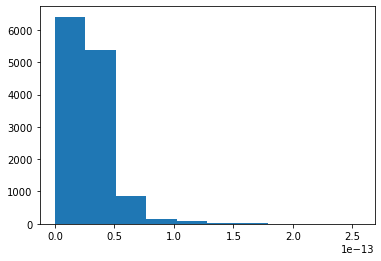

In [266]:
plt.hist(np.abs(y_hat - test_y))

In [267]:
y_hat

array([199.2 , 100.  , 107.92, ...,  85.  ,  65.7 ,  75.  ])

In [268]:
test_y

array([199.2 , 100.  , 107.92, ...,  85.  ,  65.7 ,  75.  ])